## Final Project
- Name: Haiting Huang 



- Brown ID: 140556419 



- Date: 2022.12.08


In [1]:
# Check Environment
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.10 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.10"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.10"):
    print(FAIL, "Python version 3.10 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.22.4", 'matplotlib': "3.5.2",'sklearn': "1.1.1", 
                'pandas': "1.4.2",'xgboost': "1.5.1", 'shap': "0.40.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)



[ OK ] Python version is 3.10.5

[ OK ] numpy version 1.22.4 is installed.
[ OK ] matplotlib version 3.5.2 is installed.
[ OK ] sklearn version 1.1.1 is installed.
[ OK ] pandas version 1.4.2 is installed.
[ OK ] xgboost version 1.5.1 is installed.


/Users/huanghaiting/opt/anaconda3/envs/Data1030Fall2022/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[ OK ] shap version 0.40.0 is installed.


In [1]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression
import math
import pickle
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import shap
from sklearn.inspection import permutation_importance

### Exploratory Data Analysis

- Read and view the general data

In [3]:
df = pd.read_csv('../data/CO2 Emissions_Canada.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


-  dataframe general information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [6]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [7]:
df.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

In [8]:
df.shape

(7385, 12)

In [9]:
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [10]:
df.shape # check the variables in row and col

(7385, 12)

In [11]:
df.columns # easily to see the col names

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [12]:
# know the range
df['CO2 Emissions(g/km)'].describe()

count    7385.000000
mean      250.584699
std        58.512679
min        96.000000
25%       208.000000
50%       246.000000
75%       288.000000
max       522.000000
Name: CO2 Emissions(g/km), dtype: float64

In [13]:
# For knowing the variables' name with its type in a easy way

var_col = []
num_col = []
for i in df.columns:
    if df[i].dtype == object:
        var_col.append(i)
    elif df[i].dtype != object:
        num_col.append(i)
print("Categorical features: ", var_col )
print("Numerical features: ", num_col )

Categorical features:  ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']
Numerical features:  ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']


In [14]:
df.describe(exclude='number')

,Make,Model,Vehicle Class,Transmission,Fuel Type
count,7385,7385,7385,7385,7385
unique,42,2053,16,27,5
top,FORD,F-150 FFV 4X4,SUV - SMALL,AS6,X
freq,628,32,1217,1324,3637


In [15]:
df.duplicated().sum()# unique

1103

In [16]:
df[df.duplicated() == True]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
1075,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
1076,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
1081,ALFA ROMEO,4C,TWO-SEATER,1.8,4,AM6,Z,9.7,6.9,8.4,34,193
1082,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A6,Z,18.0,12.6,15.6,18,359
1084,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,AM7,Z,17.4,11.3,14.7,19,338
...,...,...,...,...,...,...,...,...,...,...,...,...
7356,TOYOTA,Tundra,PICKUP TRUCK - STANDARD,5.7,8,AS6,X,17.7,13.6,15.9,18,371
7365,VOLKSWAGEN,Golf GTI,COMPACT,2.0,4,M6,X,9.8,7.3,8.7,32,203
7366,VOLKSWAGEN,Jetta,COMPACT,1.4,4,AS8,X,7.8,5.9,7.0,40,162
7367,VOLKSWAGEN,Jetta,COMPACT,1.4,4,M6,X,7.9,5.9,7.0,40,163


In [17]:
df.drop_duplicates(keep='first', inplace = True)# delete the duplicate

In [18]:
df.shape

(6282, 12)

In [19]:
df.duplicated().sum()# unique

0

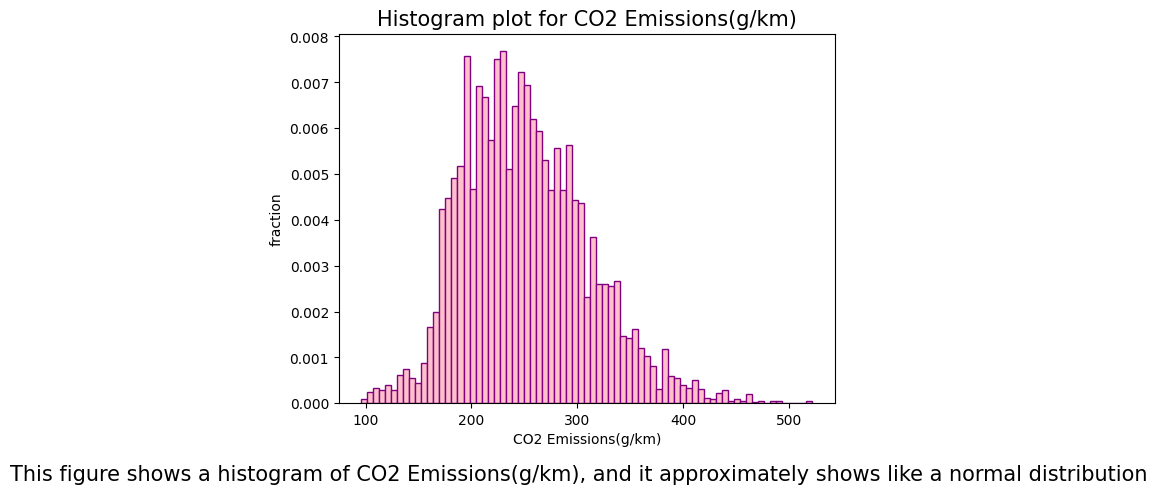

In [21]:
df['CO2 Emissions(g/km)'].plot.hist(bins = 75, edgecolor = 'Purple', color = 'Pink', density = True)  
plt.xlabel('CO2 Emissions(g/km)')
plt.ylabel('fraction')
# caption
plt.title('Histogram plot for CO2 Emissions(g/km)', fontsize = 15)
plt.figtext(0.5, -0.05, 'This figure shows a histogram of CO2 Emissions(g/km), and it approximately shows like a normal distribution', wrap=True, horizontalalignment='center', fontsize=15)
plt.savefig('../figures/corr.png', format='png', bbox_inches="tight", dpi=300)
plt.show()

<Figure size 1500x1000 with 0 Axes>

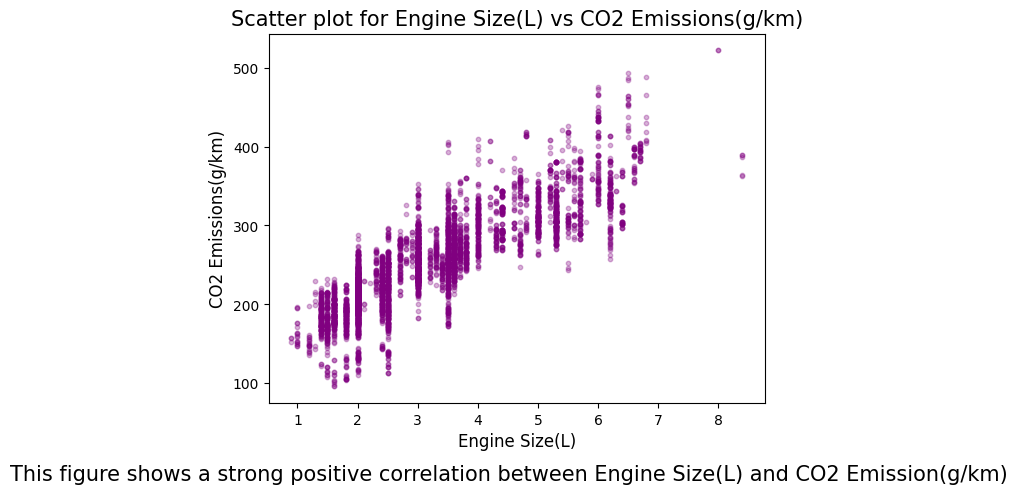

In [22]:
# engine size vs Co2 emission num vs num
plt.figure(figsize=(15,10))
df.plot.scatter('Engine Size(L)','CO2 Emissions(g/km)', s=10, alpha=0.3, color = 'Purple') # alpha=0.1,s=10
plt.xlabel('Engine Size(L)', fontsize = 12)
plt.ylabel('CO2 Emissions(g/km)', fontsize = 12)
plt.figtext(0.5, -0.05, 'This figure shows a strong positive correlation between Engine Size(L) and CO2 Emission(g/km)', wrap=True, horizontalalignment='center', fontsize=15)
plt.title('Scatter plot for Engine Size(L) vs CO2 Emissions(g/km)', fontsize = 15)
plt.savefig('../figures/corr2.png', format='png', bbox_inches="tight", dpi=300)
plt.show()

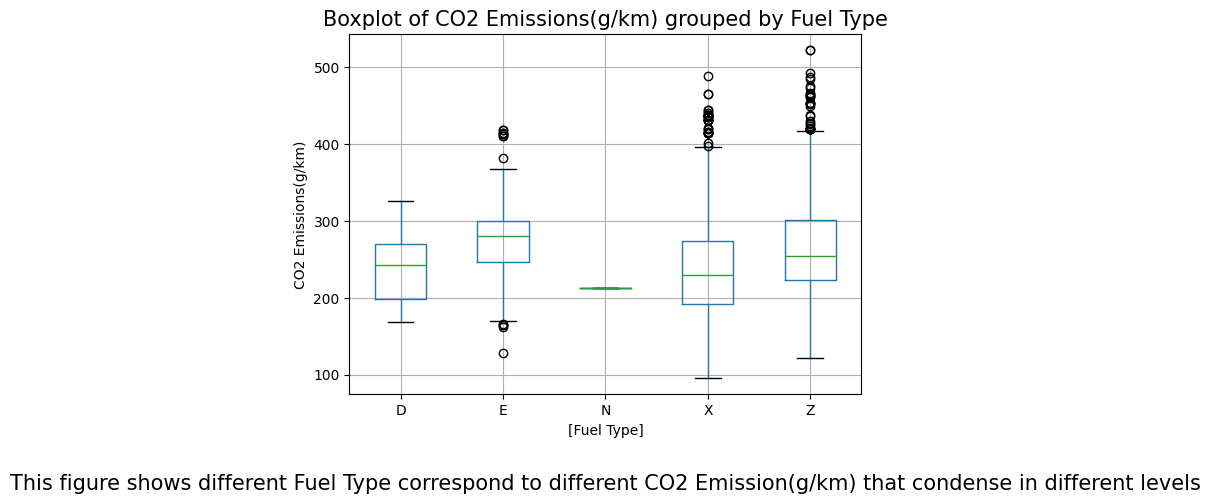

In [24]:
# num vs cat, emission vs fueltype
df[['CO2 Emissions(g/km)','Fuel Type']].boxplot(by='Fuel Type')
plt.ylabel('CO2 Emissions(g/km)')
plt.title('Boxplot of CO2 Emissions(g/km) grouped by Fuel Type', fontsize = 15)
plt.suptitle('')
plt.figtext(0.5, -0.05, 'This figure shows different Fuel Type correspond to different CO2 Emission(g/km) that condense in different levels', wrap=True, horizontalalignment='center', fontsize=15)
plt.savefig('../figures/corr3.png', format='png', bbox_inches="tight", dpi=300)
plt.show()

<Figure size 500x300 with 0 Axes>

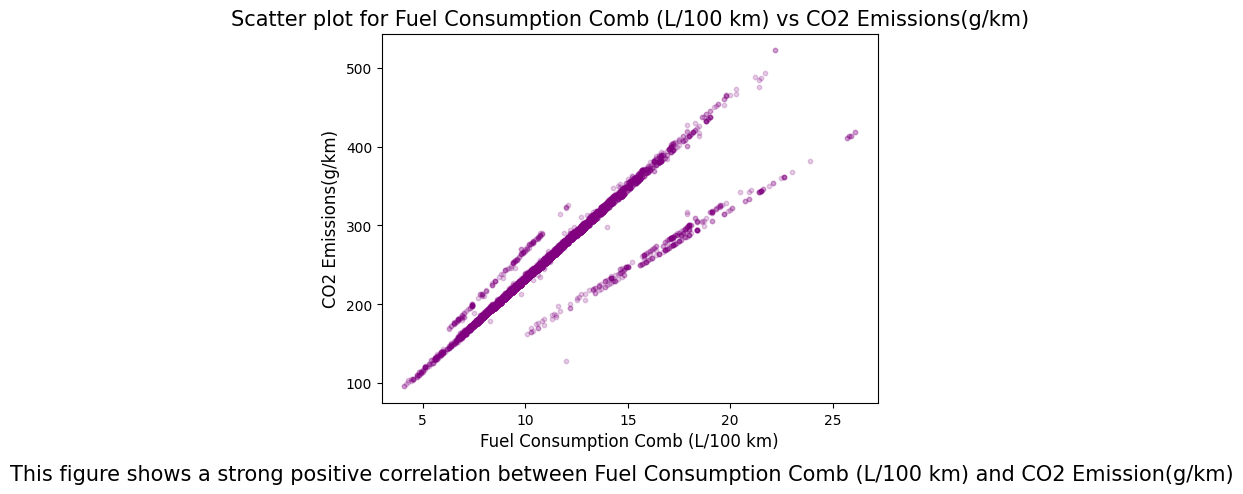

In [25]:
#Fuel Consumption Comb (L/100 km) vs Co2 emission num vs num
plt.figure(figsize=(5,3))
df.plot.scatter('Fuel Consumption Comb (L/100 km)','CO2 Emissions(g/km)',s=10,alpha=0.2, color = 'Purple') # alpha=0.1,s=10
plt.xlabel('Fuel Consumption Comb (L/100 km)', fontsize = 12)
plt.ylabel('CO2 Emissions(g/km)', fontsize = 12)
plt.title('Scatter plot for Fuel Consumption Comb (L/100 km) vs CO2 Emissions(g/km)', fontsize = 15)
plt.figtext(0.5, -0.05, 'This figure shows a strong positive correlation between Fuel Consumption Comb (L/100 km) and CO2 Emission(g/km)', wrap=True, horizontalalignment='center', fontsize=15)
plt.savefig('../figures/corr4.png', format='png', bbox_inches="tight", dpi=300)
plt.show()

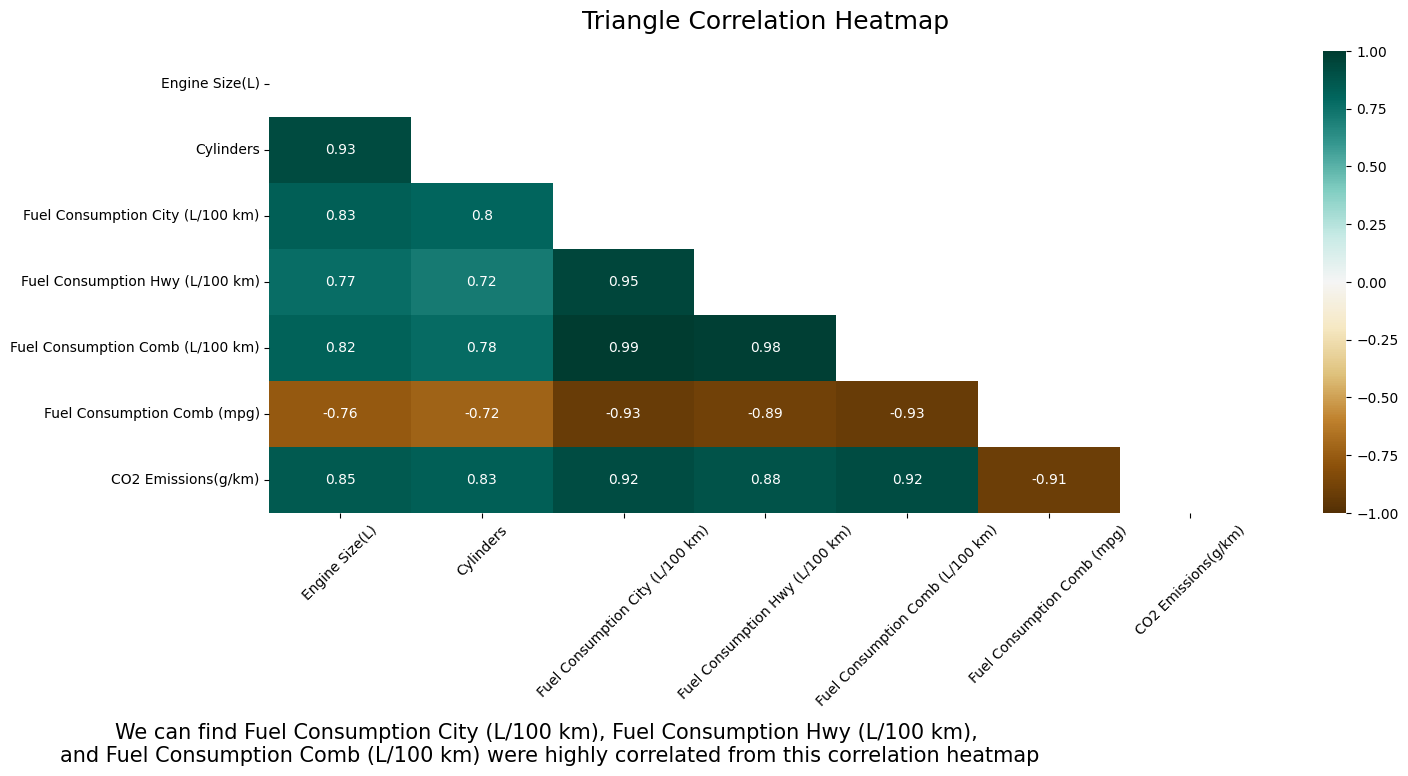

In [26]:
# use feature matrix calculate the Pearson correlation matrix and visualize the correlation matrix as heatmap
# resources: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
plt.figtext(0.3, -0.3, 'We can find Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km), \nand Fuel Consumption Comb (L/100 km) were highly correlated from this correlation heatmap', wrap=True, horizontalalignment='center', fontsize=15)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.xticks(rotation = 45)
plt.savefig('../figures/corr5.png', format='png', bbox_inches="tight", dpi=300)

In [27]:
df.drop(['CO2 Emissions(g/km)'],axis=1, inplace=True)

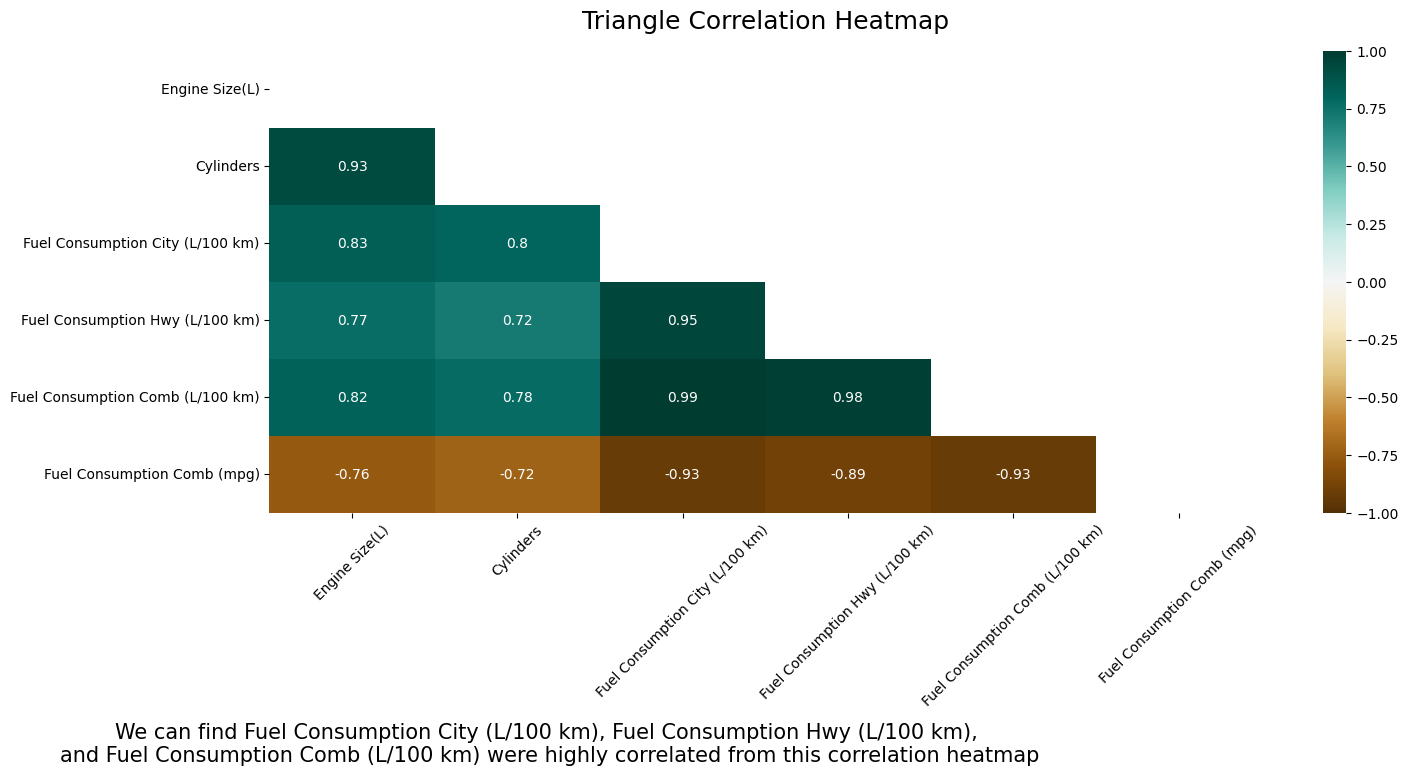

In [28]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
plt.figtext(0.3, -0.3, 'We can find Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km), \nand Fuel Consumption Comb (L/100 km) were highly correlated from this correlation heatmap', wrap=True, horizontalalignment='center', fontsize=15)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.xticks(rotation=45)
plt.savefig('../figures/corr6.png', format='png', bbox_inches="tight", dpi=300)

In [29]:
df.drop(['Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)'],axis=1, inplace=True)

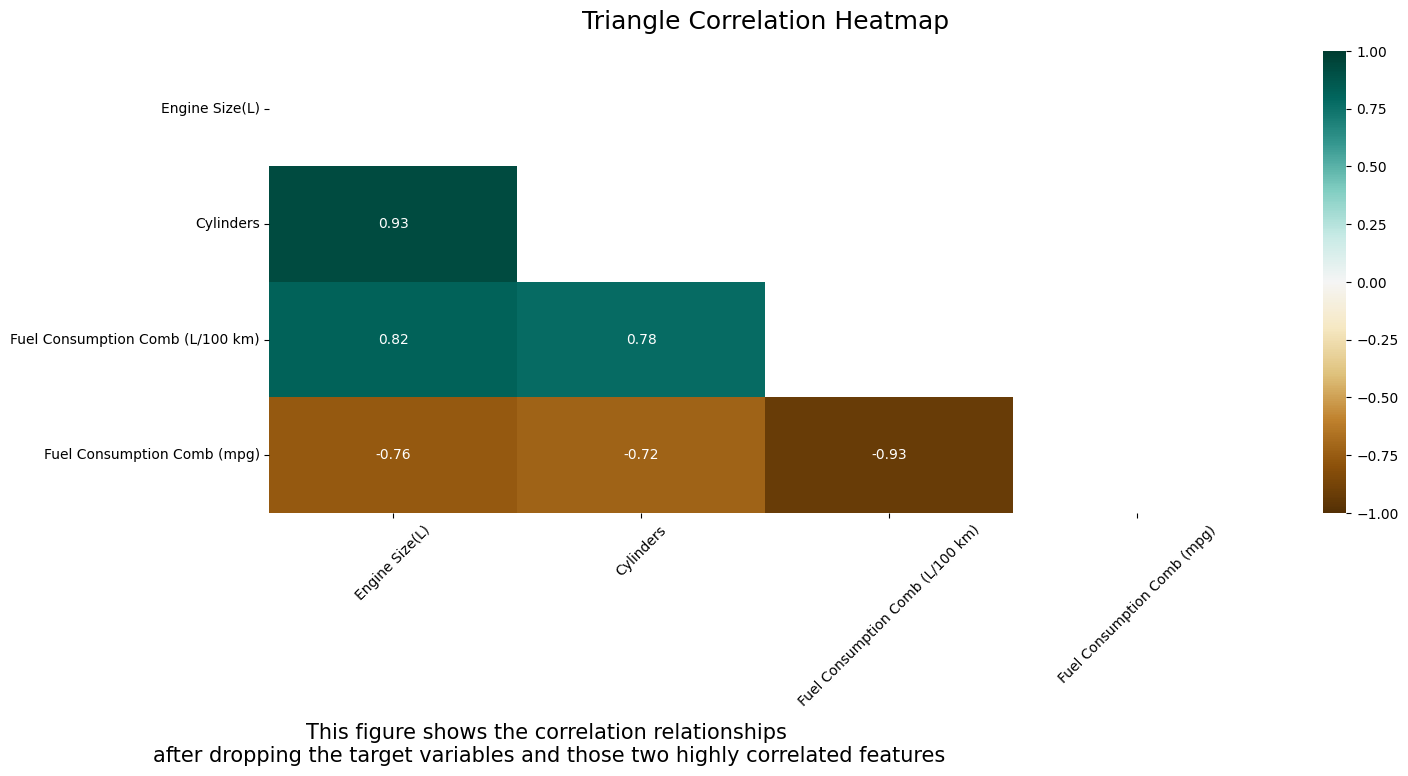

In [30]:
# use feature matrix calculate the Pearson correlation matrix and visualize the correlation matrix as heatmap
# resources: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
plt.figtext(0.3, -0.3, 'This figure shows the correlation relationships \nafter dropping the target variables and those two highly correlated features', wrap=True, horizontalalignment='center', fontsize=15)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.xticks(rotation=45)
plt.savefig('../figures/corr7.png', format='png', bbox_inches="tight", dpi=300)


In [2]:
df = pd.read_csv('../data/CO2 Emissions_Canada.csv')
df.drop_duplicates(keep='first', inplace = True)# delete the duplicate
df.drop(['Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)', 'Make', 'Model'],axis=1, inplace=True)

### Preprocess

In [3]:
# after frop
# let's separate the feature matrix X, and target variable y
y = df['CO2 Emissions(g/km)'] # remember, we want to predict who earns more than 50k or less than 50k
X = df.loc[:, df.columns != 'CO2 Emissions(g/km)'] # all other columns are features

random_state = 42

# split to separate out the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8,random_state=random_state)


In [4]:
onehot_ftrs = ['Vehicle Class', 'Transmission', 'Fuel Type']
std_ftrs = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='infrequent_if_exist', max_categories=8), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_train_prep = clf.fit_transform(X_train)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)
print(X_test_prep.shape)

features_name = preprocessor.get_feature_names_out()
print('Features name', features_name)


(5025, 7)
(5025, 24)
[[ 0.          0.          0.         ... -0.87380374 -0.61200082
   0.49144898]
 [ 0.          0.          0.         ...  1.30528499  0.57438064
  -0.7518122 ]
 [ 0.          0.          0.         ...  1.30528499  0.4726908
  -0.61367207]
 ...
 [ 0.          1.          0.         ... -0.87380374 -0.78148388
   0.62958911]
 [ 1.          0.          0.         ... -0.87380374 -1.01876018
   1.04400951]
 [ 0.          0.          0.         ... -0.87380374 -0.8153805
   0.76772925]]
(1257, 24)
Features name ['onehot__Vehicle Class_COMPACT' 'onehot__Vehicle Class_FULL-SIZE'
 'onehot__Vehicle Class_MID-SIZE'
 'onehot__Vehicle Class_PICKUP TRUCK - STANDARD'
 'onehot__Vehicle Class_SUBCOMPACT' 'onehot__Vehicle Class_SUV - SMALL'
 'onehot__Vehicle Class_SUV - STANDARD'
 'onehot__Vehicle Class_infrequent_sklearn' 'onehot__Transmission_A6'
 'onehot__Transmission_A8' 'onehot__Transmission_AM7'
 'onehot__Transmission_AS6' 'onehot__Transmission_AS7'
 'onehot__Transmission_

### Methods

In [5]:
# pipeline function 
def MLpipe_KFold_RMSE(X, y, preprocessor, model, param_grid, n_states = 10):
    # result holders
    scores = []
    models = []
    
    for i in range(n_states):
        # split train/test
        X_other, X_test, y_other, y_test = train_test_split(X,y,train_size = 0.8,random_state=i)
        # make k-fold CV data
        kf = KFold(n_splits=5, shuffle=True, random_state=i)
        # build pipeline
        pipe = make_pipeline(preprocessor, model)
        # grid search all parameters
        grid = GridSearchCV(pipe, param_grid, cv=kf, scoring='neg_root_mean_squared_error',
                            return_train_score = True, n_jobs=-1, verbose=False)
        grid.fit(X_other, y_other)
        
        # save the best model
        models.append(grid.best_estimator_)
        # save the score on test data
        scores.append(grid.score(X_test, y_test)) 
    
    return models, scores

In [18]:
# baseline
model = DummyRegressor(strategy="mean")
# param_grid 
param_grid = {}
# x as intercept
x_base =  np.reshape(np.full(len(y_train), 1), (len(y_train), 1))
models_base, scores_lr = MLpipe_KFold_RMSE(x_base, y_train, ColumnTransformer(transformers=[]), model, param_grid)
# print outcomes on KFold
print('Best model:', models_base[np.argmax(scores_lr)])
print('Mean RMSE score:', -np.mean(scores_lr))
print('Standard devation of RMSE score:', np.std(scores_lr))
# result on test data
y_pred_train = np.full(len(y_train), np.mean(y_train))
y_pred_test = np.full(len(y_test), np.mean(y_test))
print("RMSE on test:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("RMSE std on test:", np.std([np.sqrt(mean_squared_error(y1, y2)) for y1, y2 in zip(np.array_split(y_test, 10), np.array_split(y_pred_test, 10))]))
pickle.dump(model, open('../results/base_model.pkl', 'wb'))

Best model: Pipeline(steps=[('columntransformer', ColumnTransformer(transformers=[])),
                ('dummyregressor', DummyRegressor())])
Mean RMSE score: 58.743550338617375
Standard devation of RMSE score: 0.948830475175565
RMSE on test: 60.07263716406082
RMSE std on test: 4.268197920486056


In [19]:
# linear regression with l1 regularization
model = Lasso(max_iter=1000000)
# param_grid
param_grid = {'lasso__alpha': np.logspace(-5, 3, 30)}
# run the modeling pipeline
models_lasso, scores_lasso = MLpipe_KFold_RMSE(X_train, y_train, preprocessor, model, param_grid) 
# print outcomes on KFold
print('Best model:', models_lasso[np.argmax(scores_lasso)])
print('Mean RMSE score:', -np.mean(scores_lasso))
print('Standard devation of RMSE score:', np.std(scores_lasso))
# fit model with full training set
lasso_model = models_lasso[np.argmax(scores_lasso)].fit(X_train, y_train)
y_test_pred = lasso_model.predict(X_test)
# get RMSE on test set
print("RMSE on test:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("RMSE std on test:", np.std([np.sqrt(mean_squared_error(y1, y2)) for y1, y2 in zip(np.array_split(y_test, 10), np.array_split(y_test_pred, 10))]))
pickle.dump(lasso_model, open('../results/lasso_model.pkl', 'wb'))


Best model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=8,
                                                                sparse=False),
                                                  ['Vehicle Class',
                                                   'Transmission',
                                                   'Fuel Type']),
                                                 ('std', StandardScaler(),
                                                  ['Engine Size(L)',
                                                   'Cylinders',
                                                   'Fuel Consumption Comb '
                                                   '(L/100 km)',
                                                   'Fuel Consumption Comb '
 

In [20]:
# linear regression with l2 regularization
model = Ridge(max_iter=1000000)
# param_grid
param_grid = {'ridge__alpha': np.logspace(-4, 4, 30)}
# run the modeling pipeline
models_ridge, scores_ridge = MLpipe_KFold_RMSE(X_train, y_train, preprocessor, model, param_grid) 
# print outcomes on KFold
print('Best model:', models_ridge[np.argmax(scores_ridge)])
print('Mean test score:', -np.mean(scores_ridge))
print('Standard devation of test score:', np.std(scores_ridge))
# fit model with full training set
ridge_model = models_ridge[np.argmax(scores_ridge)].fit(X_train, y_train)
y_test_pred = ridge_model.predict(X_test)
# get RMSE on test set
print("RMSE on test:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("RMSE std on test:", np.std([np.sqrt(mean_squared_error(y1, y2)) for y1, y2 in zip(np.array_split(y_test, 10), np.array_split(y_test_pred, 10))]))
pickle.dump(ridge_model, open('../results/ridge_model.pkl', 'wb'))

Best model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=8,
                                                                sparse=False),
                                                  ['Vehicle Class',
                                                   'Transmission',
                                                   'Fuel Type']),
                                                 ('std', StandardScaler(),
                                                  ['Engine Size(L)',
                                                   'Cylinders',
                                                   'Fuel Consumption Comb '
                                                   '(L/100 km)',
                                                   'Fuel Consumption Comb '
 

In [21]:
# linear regression with an elastic net
model = ElasticNet(max_iter=10000000, random_state = 123)
# param_grid
param_grid = {"elasticnet__alpha":np.logspace(-4, 4, 10),
              "elasticnet__l1_ratio":np.arange(0.1,1.1,0.1)}
# run the modeling pipeline
models_elastic, scores_elastic = MLpipe_KFold_RMSE(X_train, y_train, preprocessor, model, param_grid) 
# print outcomes on KFold
print('Best model:', models_elastic[np.argmax(scores_elastic)])
print('Mean test score:', -np.mean(scores_elastic))
print('Standard devation of test score:', np.std(scores_elastic))
# fit model with full training set
elastic_model = models_elastic[np.argmax(scores_elastic)].fit(X_train, y_train)
y_test_pred = elastic_model.predict(X_test)
# get RMSE on test set
print("RMSE on test:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("RMSE std on test:", np.std([np.sqrt(mean_squared_error(y1, y2)) for y1, y2 in zip(np.array_split(y_test, 10), np.array_split(y_test_pred, 10))]))
pickle.dump(elastic_model, open('../results/elastic_model.pkl', 'wb'))


Best model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=8,
                                                                sparse=False),
                                                  ['Vehicle Class',
                                                   'Transmission',
                                                   'Fuel Type']),
                                                 ('std', StandardScaler(),
                                                  ['Engine Size(L)',
                                                   'Cylinders',
                                                   'Fuel Consumption Comb '
                                                   '(L/100 km)',
                                                   'Fuel Consumption Comb '
 

In [6]:
# RF
model = RandomForestRegressor(random_state = 42)
# param_grid
param_grid = {'randomforestregressor__max_depth': [1, 3, 10], 
              'randomforestregressor__max_features': np.arange(0.1,1.1,0.1)}
# run the modeling pipeline
models_rf, scores_rf = MLpipe_KFold_RMSE(X_train, y_train, preprocessor, model, param_grid) 
# print outcomes on KFold
print('Best model:', models_rf[np.argmax(scores_rf)])
print('Mean test score:', -np.mean(scores_rf))
print('Standard devation of test score:', np.std(scores_rf))
# fit model with full training set
rf_model = models_rf[np.argmax(scores_rf)].fit(X_train, y_train)
y_test_pred = rf_model.predict(X_test)
# get RMSE on test set
print("RMSE on test:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("RMSE std on test:", np.std([np.sqrt(mean_squared_error(y1, y2)) for y1, y2 in zip(np.array_split(y_test, 10), np.array_split(y_test_pred, 10))]))
pickle.dump(rf_model, open('../results/rf_model.pkl', 'wb'))


Best model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=8,
                                                                sparse=False),
                                                  ['Vehicle Class',
                                                   'Transmission',
                                                   'Fuel Type']),
                                                 ('std', StandardScaler(),
                                                  ['Engine Size(L)',
                                                   'Cylinders',
                                                   'Fuel Consumption Comb '
                                                   '(L/100 km)',
                                                   'Fuel Consumption Comb '
 

In [23]:
# KNN
model = KNeighborsRegressor()
# param_grid
param_grid = {'kneighborsregressor__n_neighbors': [3, 5, 10, 20, 50, 100]}
# run the modeling pipeline
models_knn, scores_knn = MLpipe_KFold_RMSE(X_train, y_train, preprocessor, model, param_grid) 
# print outcomes on KFold
print('Best model:', models_knn[np.argmax(scores_knn)])
print('Mean test score:', -np.mean(scores_knn))
print('Standard devation of test score:', np.std(scores_knn))
# fit model with full training set
knn_model = models_knn[np.argmax(scores_knn)].fit(X_train, y_train)
y_test_pred = knn_model.predict(X_test)
# get RMSE on test set
print("RMSE on test:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("RMSE std on test:", np.std([np.sqrt(mean_squared_error(y1, y2)) for y1, y2 in zip(np.array_split(y_test, 10), np.array_split(y_test_pred, 10))]))
pickle.dump(knn_model, open('../results/knn_model.pkl', 'wb'))

Best model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=8,
                                                                sparse=False),
                                                  ['Vehicle Class',
                                                   'Transmission',
                                                   'Fuel Type']),
                                                 ('std', StandardScaler(),
                                                  ['Engine Size(L)',
                                                   'Cylinders',
                                                   'Fuel Consumption Comb '
                                                   '(L/100 km)',
                                                   'Fuel Consumption Comb '
 

### Result

In [7]:
# fit final model full training set
final_model = models_rf[np.argmax(scores_rf)].fit(X_train, y_train)
y_test_pred = final_model.predict(X_test)
# get RMSE on test set
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
# get R2 on test set
print("R2:", r2_score(y_test, y_test_pred))
# get MAE on test set
print("MAE:", mean_absolute_error(y_test, y_test_pred))

RMSE: 3.8822989600550635
R2: 0.9958233839241374
MAE: 2.2931620705047138


In [8]:
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model 
explainer = shap.TreeExplainer(final_model[1])
# transform the test set
X_test_transformed = final_model[0].transform(X_test) 
print(np.shape(X_test_transformed))
# calculate shap values on the first 1000 points in the test 
shap_values = explainer.shap_values(X_test_transformed[:1000]) 
print(np.shape(shap_values))

(1257, 24)
(1000, 24)


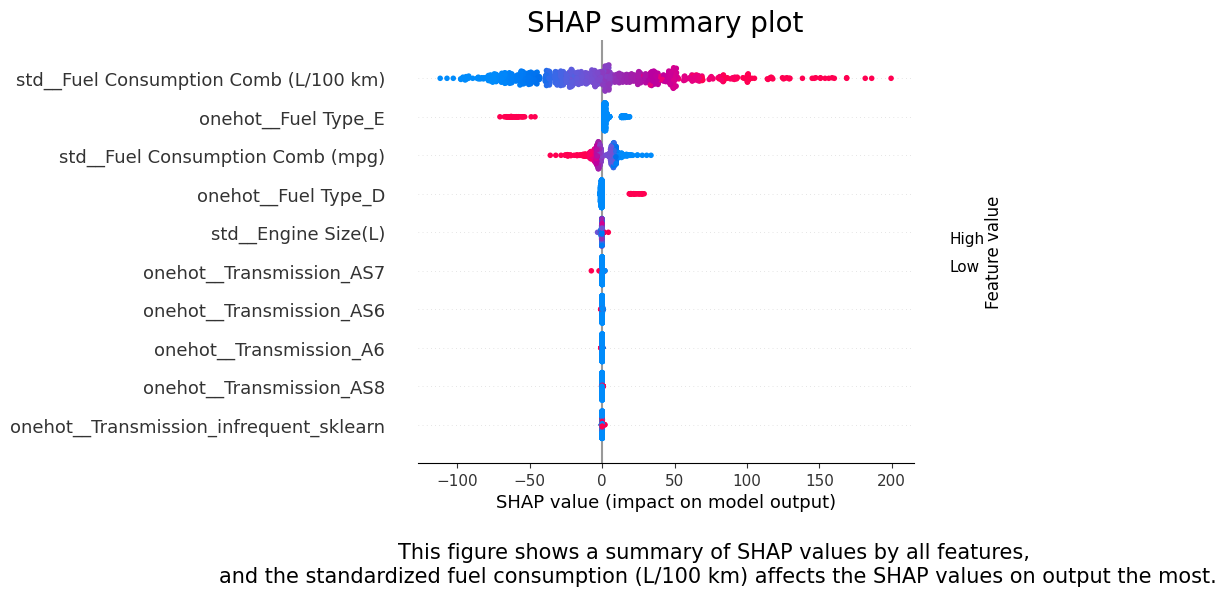

In [10]:
shap.summary_plot(shap_values, X_test_transformed[:1000],feature_names = features_name, max_display=10, 
                  show=False)
plt.title("SHAP summary plot", fontsize=20)
plt.figtext(0.5, -0.1, 'This figure shows a summary of SHAP values by all features, \nand the standardized fuel consumption (L/100 km) affects the SHAP values on output the most.', wrap=True, horizontalalignment='center', fontsize=15)
plt.savefig('../figures/corr8.png', format='png', bbox_inches="tight", dpi=300)


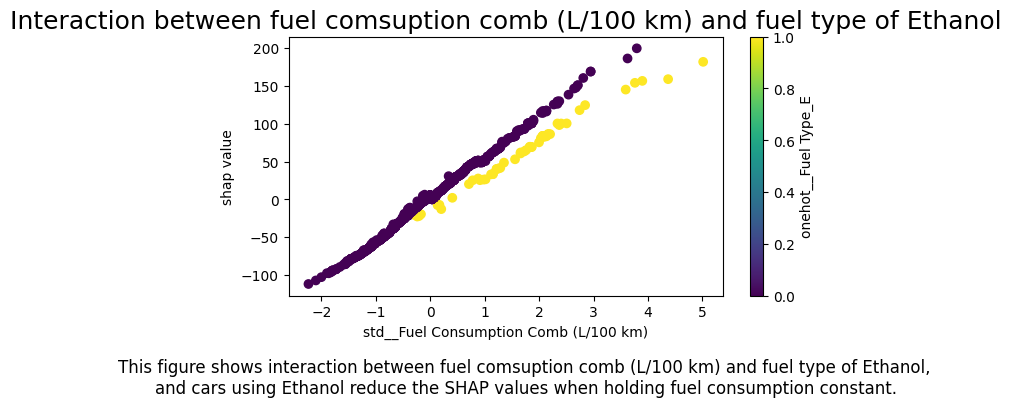

In [36]:
ftr1 = 'std__Fuel Consumption Comb (L/100 km)'
ftr2 = 'onehot__Fuel Type_E'
indx1 = int(np.argwhere(features_name==ftr1))
indx2 = int(np.argwhere(features_name==ftr2))

plt.figure(figsize=(6.4,3.6))
plt.scatter(X_test_transformed[:1000,indx1],shap_values[:1000,indx1],c=X_test_transformed[:1000,indx2])
plt.ylabel('shap value')
plt.xlabel(ftr1)
plt.title("Interaction between fuel comsuption comb (L/100 km) and fuel type of Ethanol", fontsize=18)
plt.colorbar(label=ftr2)
plt.figtext(0.5, -0.1, 'This figure shows interaction between fuel comsuption comb (L/100 km) and fuel type of Ethanol, \nand cars using Ethanol reduce the SHAP values when holding fuel consumption constant.', wrap=True, horizontalalignment='center', fontsize=12)
plt.tight_layout()
plt.savefig('../figures/corr9.png', format='png', bbox_inches="tight", dpi=300)


In [14]:
shap.force_plot(explainer.expected_value, shap_values[100], 
                features=np.around(X_test_transformed[100,:],2), 
                feature_names = features_name, show=False, matplotlib=True)
plt.title("SHAP values to explain the predicted CO2 emission of a car", y=1.75, fontsize=24)
plt.figtext(0.5, -0.1, 'This figure shows SHAP values of the 100th car, fuel consumption (L/100 km) and fuel consumption (mpg) \nincrease the output while fuel cars using Ethanol reduce the output.', wrap=True, horizontalalignment='center', fontsize=20)
plt.savefig('../figures/corr10.png', format='png', bbox_inches="tight", dpi=300)

In [12]:
result = permutation_importance(
    final_model[1], X_test_prep, y_test, n_repeats=10, random_state=42, n_jobs=-1
)
forest_importances = pd.Series(result.importances_mean, index=features_name)

fig, ax = plt.subplots(figsize=(10,7))
forest_importances[result.importances_mean.argsort()[::-1][:8]].plot.barh(yerr=result.importances_std[result.importances_mean.argsort()[::-1][:8]], ax=ax)
ax.set_title("Feature importance using permutation on full model", fontsize=20)
ax.set_ylabel("Mean accuracy decrease")
plt.figtext(0.5, -0.15, 'This figure shows feature importance using permutation on the model. \nFuel consumption (L/100 km) fuel type of Ethanol, fuel consumption (mpg), \nand fuel type of Diesel and are most important.', wrap=True, horizontalalignment='center', fontsize=15)
fig.tight_layout()
plt.savefig('../figures/corr11.png', format='png', bbox_inches="tight", dpi=300)